In [1]:
from hyperparameters import test_loader, out_to_mask
import torch
from simple_UNet import UNet
import matplotlib.pyplot as plt

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [7]:
PATH = r"results\results\30epochs_0.001lr_5batch\network.pth"
unet = UNet(in_channels=3,
            out_channels=1,
            n_class=1,
            kernel_size=3,
            padding=1,
            stride=1).to(device)

In [8]:
unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

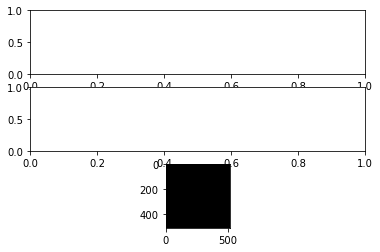

In [9]:
for x,y in test_loader:
    x = torch.permute(x, (0, 3, 2, 1))
    out = torch.squeeze(unet(x)[1])
    out = out_to_mask(out)
    out = out.detach().numpy()




    
    x = torch.permute(x, (0,3,2,1))
    x = x[1]
    x = x.detach().numpy()
    
    y = torch.squeeze(y)[1]
    y = y.detach().numpy()
    
    f, (ax1, ax2,ax3) = plt.subplots(3,1)
    ax1 = plt.imshow(x)
    ax2 = plt.imshow(y, cmap='gray')
    ax3 = plt.imshow(out, cmap='gray')
    break

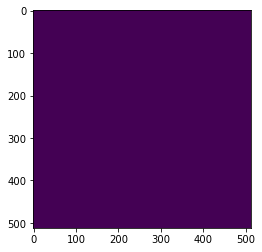

In [14]:
plt.imshow(out)